In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch


In [2]:


ims = pickle.load(open('/Users/amarklein/Initials_BA/initials/data/images_list.pickle', 'rb'))
labels = pickle.load(open('/Users/amarklein/Initials_BA/initials/data/lettersdf.pickle', 'rb'))

In [3]:

layers = [ -14, -7, 0]
all_data = {'gram' : {k:None for k in layers},
            'raw' : {k:None for k in layers}}

for case in ['gram', 'raw']:
    for l in layers:

        if case == 'gram':
            file = '/Users/amarklein/Initials_BA/initials/Reps/VGG16_Initials_Gram{}default.pickle'.format(l)
        else:
            file = '/Users/amarklein/Initials_BA/initials/Reps/VGG16_Initials_{}untrained_binary.pickle'.format(l)

        print(file)
        data = pickle.load(open(file, 'rb'))

        if type(data)==list:
            data = torch.stack([i.flatten() for i in data])
            #print(data.shape)
            

        print(type(data))
        print(case, l, data.shape)
        
        all_data[case][l] = data.numpy()


/Users/amarklein/Initials_BA/initials/Reps/VGG16_Initials_Gram-14default.pickle


KeyboardInterrupt: 

In [4]:
letters = [list(labels[labels.initial == im].letter)[0] for im in ims]
letters = np.array([l.replace('INIT_Letter_', '') for l in letters])

In [14]:
threshed_list = []
letters_list = list(letters)

for l in set(letters_list):
    count = letters_list.count(l)
    if count >= 10:
        threshed_list.append(l)


threshed_list = sorted(threshed_list)

In [15]:
len(threshed_list), len(set(letters_list))

(20, 23)

In [12]:
def plot_data(dist_data, metric, threshed_list = None):

    f, axs = plt.subplots(1,2, figsize=(12,4))

    for j,case in enumerate([ 'raw', 'gram']): #, 'raw']:

        ax = axs[j]
        if threshed_list:
            letters_ = threshed_list
        else:
            letters_ = sorted(dist_data[case][0].keys())

        for i,l in enumerate(layers):

            s1 = [dist_data[case][l][letter][0] for letter in letters_] # 0: dists_letter.mean()
            s2 = [dist_data[case][l][letter][1] for letter in letters_] # 1: dists_all.mean()
            #print(s2)

            scores = [dist_data[case][l][letter][0]/dist_data[case][l][letter][1] for letter in letters_]

            ax.plot(scores, label=str(l),  color=colors[i])

            print(l, np.nanmean(scores[:-1]), np.nanmean(s1), np.nanmean(s2))
            #ax.text(5, np.nanmean(scores), '{:0.2f} || {:0.2f} / {:0.2f} '.format(np.nanmean(scores), np.nanmean(s1), np.nanmean(s2)), 
                    #color=colors[i],
                    #fontsize=15)

        ax.set_xticks(range(len(letters_)))
        ax.set_xticklabels(letters_)
        
       # ax.set_ylim([0.4,1.2])

        ax.set_title(case)
        
    f.suptitle(metric, fontsize=15)
    plt.legend()
    plt.show()


euclidean
-14 0.9936392103336983 3209.590877303883 3246.313672688702
-7 0.9854067595388704 864.1183651442734 882.2786567136602
0 0.956088639868736 116.11161578130037 121.72509183560841
-14 1.0228874774464711 5.360543323436023e-09 5.340824873603453e-09
-7 1.0441911805651252 7.808328472191194e-09 7.44195182336436e-09
0 0.978950008356038 1.5863310354151557e-08 1.4971888982592726e-08


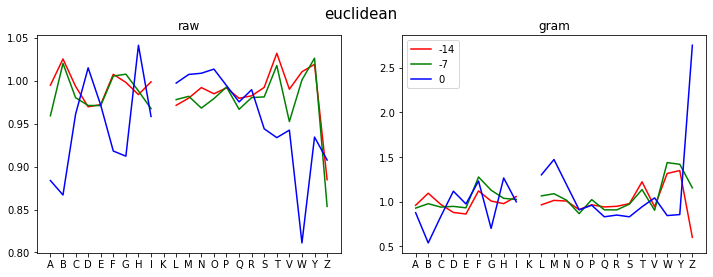

cosine
-14 0.9801578348536731 0.6654554510246874 0.6779897993080084
-7 0.95606937507068 0.6674163698072078 0.6979414281291912
0 0.9333319538792727 0.582483457634403 0.6230443555245061
-14 0.9910856970900087 0.23896488618085482 0.24271371106912715
-7 0.9795442782820624 0.6474470810633715 0.6594524669506235
0 0.983253807499942 0.887180290420968 0.9019838379700434


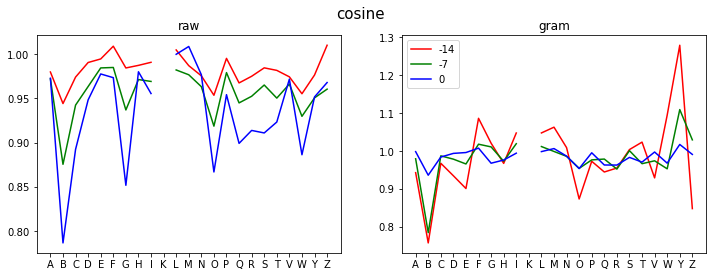

euclidean standardized
-14 1.0077475112070147 628.4711171871918 628.0150849499277
-7 1.0152520264638099 446.2315048418326 440.1362238340456
0 0.9796958841315379 215.8201518836234 216.96291104571827
-14 1.0267465516627385 691.9907210116545 684.9322472479543
-7 1.0265369696567812 706.675718045512 687.0518434996924
0 0.9750786505778007 658.3814003045322 650.8700521221267


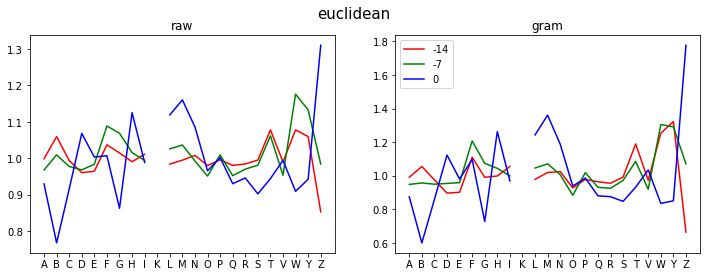

cosine standardized
-14 0.9825243428607102 0.980761848631252 0.9999019527209904
-7 0.973910717727049 0.9724013908128831 0.9997794210694798
0 0.9699808132808008 0.9689672327517846 0.9993625990376506
-14 0.9701047728077169 0.9431128130627049 0.9903747603754591
-7 0.9784099268271272 0.9678086952746507 0.9929202973620702
0 0.9794305501097489 0.9702893752145354 0.9907510375833123


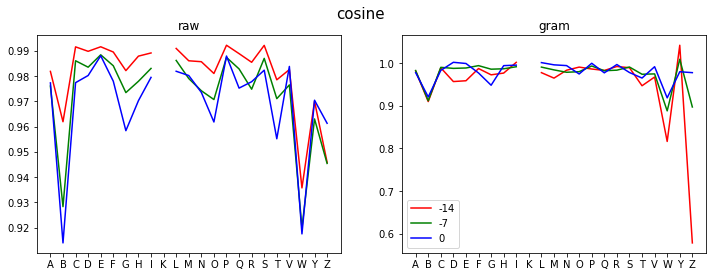

In [13]:

layers = [ -14, -7, 0]

metric_cases = [ 'euclidean', 'cosine']  #'cosine',
colors = ['red', 'green', 'blue']

for metric in metric_cases:

    print(metric)
    dist_data = pickle.load(open('./data/data_default_{}_.p'.format(metric), 'rb'))
    plot_data(dist_data, metric)
    
    
for metric in metric_cases:
    print(metric, 'standardized')
    dist_data = pickle.load(open('./data/data_default_{}_std.p'.format(metric), 'rb'))
    plot_data(dist_data, metric)
    

#for metric in ['dot']:
#    print(metric)
#    dist_data = pickle.load(open('data_{}_no_std.p'.format(metric), 'rb'))
#    plot_data(dist_data, metric)
    

# Ratio euclidean


#### euclidean
- 0.001 / 1000  = 0.001   -> tight structure
- 1./1. = 1. -> invariant
- 1000/ 0.11 >> 1. -> strange behavior (doesn't really make sense)

### cosine

 - score of 1: equally similar in than avg cluster
 - score > 1: more similar in-class structure than avg distance  (1.0/0.00001)
 - score < 1: looser in-class structure than avg distance  (0.0001/1.0) (not sure why this would happen...)


In [35]:
# This is super slow so I didn't compute it...

import sklearn.metrics
from sklearn.cluster import KMeans
import numpy as np


K = len(list(set(letters)))
y_dict = {k:i for i,k in enumerate(list(set(letters)))}
y_true = [y_dict[l] for l in letters]

for case in ['gram', 'raw']:
    for l in layers:

        X = all_data[case][l]
        
      #  kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
      #  ypred = kmeans.labels_
      #  rand_idx = sklearn.metrics.adjusted_rand_score(y_true, ypred)
        print(case, l, X.shape) #, rand_idx)

gram -14 (5862, 262144)
gram -7 (5862, 262144)
gram 0 (5862, 262144)
raw -14 (5862, 200704)
raw -7 (5862, 100352)
raw 0 (5862, 25088)


In [8]:
import scipy.stats
for case in ['gram', 'raw']:
    S = []
    print(case)
    for l in layers:
        X = all_data[case][l]
        
        X = np.array([x/np.linalg.norm(x) for x in X])
        
        sim = np.dot(X, X.T)
        S.append(sim)

    
    print('-14 | -7', scipy.stats.pearsonr(S[0].flatten(), S[1].flatten()))
    print('-7 | 0', scipy.stats.pearsonr(S[1].flatten(), S[2].flatten()))
    print('-14 | 0', scipy.stats.pearsonr(S[0].flatten(), S[2].flatten()))

    print()

gram
-14 | -7 (0.7392152906122855, 0.0)
-7 | 0 (0.666725188526234, 0.0)
-14 | 0 (0.5144522285580195, 0.0)

raw
-14 | -7 (0.776376266527596, 0.0)
-7 | 0 (0.8807270192538958, 0.0)
-14 | 0 (0.6627610887923567, 0.0)



In [3]:
plt.imshow(sim)
plt.colorbar()
plt.show()

NameError: name 'sim' is not defined

In [5]:
dist_data = pickle.load(open('./data/data_euclidean_std.p', 'rb'))

In [6]:
dist_data

{'gram': {-21: {'O': (307.3683123261862, 345.5716009602271, 105),
   'W': (404.04349387932524, 345.5716009602271, 41),
   'M': (343.26528818568056, 345.5716009602271, 169),
   'F': (357.034062114157, 345.5716009602271, 72),
   'G': (309.3175463906294, 345.5716009602271, 52),
   'E': (296.4013981485003, 345.5716009602271, 493),
   'P': (316.83068865464486, 345.5716009602271, 361),
   'T': (390.19704071145605, 345.5716009602271, 449),
   'Z': (197.52984299500588, 345.5716009602271, 11),
   'S': (326.51243569345644, 345.5716009602271, 686),
   'I': (353.4230745448953, 345.5716009602271, 579),
   'L': (324.18605654672626, 345.5716009602271, 227),
   'V': (320.48973419043114, 345.5716009602271, 176),
   'B': (268.5908174878422, 345.5716009602271, 9),
   'D': (303.7990463331138, 345.5716009602271, 337),
   'Q': (318.0785023599095, 345.5716009602271, 668),
   'N': (336.1032099834523, 345.5716009602271, 247),
   'R': (324.93975268327046, 345.5716009602271, 45),
   'Y': (360.343349661167, 345.5